In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [2]:
ed=pd.read_csv('edstays.csv')
hos=pd.read_csv('admissions.csv')
icu=pd.read_csv('icustays.csv')

In [3]:
ed['race'].value_counts()

WHITE                                        228123
BLACK/AFRICAN AMERICAN                        76798
OTHER                                         20752
HISPANIC/LATINO - PUERTO RICAN                14036
WHITE - OTHER EUROPEAN                         8992
HISPANIC/LATINO - DOMINICAN                    8330
BLACK/CAPE VERDEAN                             7638
ASIAN - CHINESE                                7348
ASIAN                                          7294
UNKNOWN                                        7083
WHITE - RUSSIAN                                6091
BLACK/AFRICAN                                  4887
BLACK/CARIBBEAN ISLAND                         3675
HISPANIC OR LATINO                             3141
HISPANIC/LATINO - GUATEMALAN                   2356
ASIAN - ASIAN INDIAN                           1567
ASIAN - SOUTH EAST ASIAN                       1533
HISPANIC/LATINO - SALVADORAN                   1497
WHITE - BRAZILIAN                              1484
PORTUGUESE  

In [4]:
mapping = {"WHITE": "White","BLACK/AFRICAN AMERICAN": "Black","OTHER": "Other","HISPANIC/LATINO - PUERTO RICAN": "Other","WHITE - OTHER EUROPEAN": "White","HISPANIC/LATINO - DOMINICAN": "Other","BLACK/CAPE VERDEAN": "Black","ASIAN - CHINESE": "Other","ASIAN": "Other","UNKNOWN": "Other","WHITE - RUSSIAN": "White","BLACK/AFRICAN": "Black","BLACK/CARIBBEAN ISLAND": "Black","HISPANIC OR LATINO": "Other","HISPANIC/LATINO - GUATEMALAN": "Other","ASIAN - ASIAN INDIAN": "Other","ASIAN - SOUTH EAST ASIAN": "Other","HISPANIC/LATINO - SALVADORAN": "Other","WHITE - BRAZILIAN": "White","PORTUGUESE": "Other","WHITE - EASTERN EUROPEAN": "White","HISPANIC/LATINO - COLUMBIAN": "Other","HISPANIC/LATINO - MEXICAN": "Other","SOUTH AMERICAN": "Other","AMERICAN INDIAN/ALASKA NATIVE": "Other","HISPANIC/LATINO - HONDURAN": "Other","HISPANIC/LATINO - CUBAN": "Other","HISPANIC/LATINO - CENTRAL AMERICAN": "Other","ASIAN - KOREAN": "Other","PATIENT DECLINED TO ANSWER": "Other","NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER": "Other","MULTIPLE RACE/ETHNICITY": "Other","UNABLE TO OBTAIN": "Other"}

In [5]:
ed['race'] = ed['race'].map(mapping)

In [6]:
#응급실에 오는 인종을 3개로 축소화 
ed['race'].value_counts()

White    246002
Black     92998
Other     86087
Name: race, dtype: int64

In [7]:
ed['arrival_transport'].value_counts()

WALK IN       251849
AMBULANCE     155752
UNKNOWN        15352
OTHER           1266
HELICOPTER       868
Name: arrival_transport, dtype: int64

In [8]:
ed['arrival_transport']=ed['arrival_transport'].replace("UNKNOWN","OTHER")

In [9]:
ed['disposition'].value_counts()

HOME                           241632
ADMITTED                       158010
TRANSFER                         7025
LEFT WITHOUT BEING SEEN          6155
ELOPED                           5710
OTHER                            4297
LEFT AGAINST MEDICAL ADVICE      1881
EXPIRED                           377
Name: disposition, dtype: int64

In [10]:
ed_id=set(ed[(ed['hadm_id'].isna()) & (ed['disposition']== 'HOME')]['stay_id'])
len(ed_id)

205135

In [11]:
noted=ed[(~ed['stay_id'].isin(ed_id))&(ed['disposition']== 'ADMITTED')]

In [12]:
die_ed=ed[(~ed['stay_id'].isin(ed_id))&(ed['disposition']== 'EXPIRED')]

In [13]:
die_ed

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
1450,10030487,NaN,30308539,2128-07-31 09:19:00,2128-07-31 16:15:00,F,White,AMBULANCE,EXPIRED
1680,10036275,NaN,34547687,2171-03-30 06:08:00,2171-03-30 14:05:00,M,White,AMBULANCE,EXPIRED
1692,10036836,NaN,39740841,2118-05-22 02:25:00,2118-05-22 05:09:00,M,Other,AMBULANCE,EXPIRED
2550,10056931,NaN,33768159,2142-06-24 19:44:00,2142-06-25 02:19:00,F,White,AMBULANCE,EXPIRED
3243,10078115,NaN,35630864,2148-04-24 09:08:00,2148-04-24 17:44:00,M,Other,AMBULANCE,EXPIRED
...,...,...,...,...,...,...,...,...,...
421422,19912620,NaN,30970126,2121-10-20 18:41:00,2121-10-20 23:50:00,F,Black,AMBULANCE,EXPIRED
421989,19922851,NaN,37942091,2197-02-02 10:47:00,2197-02-02 15:53:00,F,Black,AMBULANCE,EXPIRED
422256,19930293,NaN,39780645,2135-07-07 00:18:00,2135-07-07 03:32:00,M,White,AMBULANCE,EXPIRED
424849,19993842,NaN,37776073,2148-12-08 17:23:00,2148-12-08 22:11:00,M,Other,OTHER,EXPIRED


In [14]:
noted=pd.concat([noted,die_ed])

In [15]:
noted['hadm_id'].value_counts()

28297336.0    2
20404152.0    2
27542936.0    2
26320871.0    2
21732373.0    2
             ..
24573618.0    1
22834722.0    1
23192849.0    1
26561126.0    1
23463456.0    1
Name: hadm_id, Length: 157634, dtype: int64

In [16]:
values = [27542936.0, 21732373.0, 20404152.0, 21436543.0, 28297336.0, 26320871.0]

In [17]:
noted=noted[~noted['hadm_id'].isin(values)]
noted

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,White,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,White,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,White,AMBULANCE,ADMITTED
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,White,AMBULANCE,ADMITTED
5,10000084,23052089.0,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,White,WALK IN,ADMITTED
...,...,...,...,...,...,...,...,...,...
421422,19912620,NaN,30970126,2121-10-20 18:41:00,2121-10-20 23:50:00,F,Black,AMBULANCE,EXPIRED
421989,19922851,NaN,37942091,2197-02-02 10:47:00,2197-02-02 15:53:00,F,Black,AMBULANCE,EXPIRED
422256,19930293,NaN,39780645,2135-07-07 00:18:00,2135-07-07 03:32:00,M,White,AMBULANCE,EXPIRED
424849,19993842,NaN,37776073,2148-12-08 17:23:00,2148-12-08 22:11:00,M,Other,OTHER,EXPIRED


In [19]:
ed_any_1=noted[['hadm_id','intime','outtime']]
hosp=hos[['hadm_id','admittime','dischtime']]
#icu=icu[['hadm_id','intime','outtime']]
#icu.rename(columns={'intime': 'icu_intime', 'outtime': 'icu_outtime'}, inplace=True)

In [20]:
hosp

,hadm_id,admittime,dischtime
0,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00
1,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00
2,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00
3,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00
4,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00
...,...,...,...
431226,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00
431227,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00
431228,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00
431229,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00


In [21]:
hosp=hosp[hosp['hadm_id'].isin(ed_any_1['hadm_id'])]
hosp=hosp[hosp['admittime']<hosp['dischtime']]

In [23]:
ed_any_1

,hadm_id,intime,outtime
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00
4,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00
5,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00
...,...,...,...
421422,NaN,2121-10-20 18:41:00,2121-10-20 23:50:00
421989,NaN,2197-02-02 10:47:00,2197-02-02 15:53:00
422256,NaN,2135-07-07 00:18:00,2135-07-07 03:32:00
424849,NaN,2148-12-08 17:23:00,2148-12-08 22:11:00


In [22]:
hosp

,hadm_id,admittime,dischtime
0,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00
1,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00
2,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00
3,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00
5,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00
...,...,...,...
431216,25715748,2119-08-11 11:36:00,2119-08-19 11:55:00
431217,26194817,2119-06-18 21:08:00,2119-07-02 14:25:00
431226,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00
431227,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00


In [37]:
#icu=icu[icu['hadm_id'].isin(ed_any_1['hadm_id'])]
#icu=icu[icu['icu_intime']<icu['icu_outtime']]

In [24]:
ed_any_2=pd.merge(ed_any_1,hosp,on='hadm_id',how='left')
#ed_any_3=pd.merge(ed_any_2,icu,on='hadm_id',how='left')

In [25]:
ed_any_2.reset_index(inplace=True,drop=True)

In [26]:
ed_any_2

,hadm_id,intime,outtime,admittime,dischtime
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00
...,...,...,...,...,...
158370,NaN,2121-10-20 18:41:00,2121-10-20 23:50:00,NaN,NaN
158371,NaN,2197-02-02 10:47:00,2197-02-02 15:53:00,NaN,NaN
158372,NaN,2135-07-07 00:18:00,2135-07-07 03:32:00,NaN,NaN
158373,NaN,2148-12-08 17:23:00,2148-12-08 22:11:00,NaN,NaN


In [27]:
for i in ed_any_2.columns[1:]:
    ed_any_2[i]=pd.to_datetime(ed_any_2[i])

In [28]:
ed_any_2["ed_out_to_hos_in"]=ed_any_2['outtime']-ed_any_2['admittime']
#ed_any_3["ed-icu"]=ed_any_3['outtime']-ed_any_3['icu_intime']

In [29]:
ed_any_2#['ed-hosp'].describe()

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 01:07:00
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00
...,...,...,...,...,...,...
158370,NaN,2121-10-20 18:41:00,2121-10-20 23:50:00,NaT,NaT,NaT
158371,NaN,2197-02-02 10:47:00,2197-02-02 15:53:00,NaT,NaT,NaT
158372,NaN,2135-07-07 00:18:00,2135-07-07 03:32:00,NaT,NaT,NaT
158373,NaN,2148-12-08 17:23:00,2148-12-08 22:11:00,NaT,NaT,NaT


In [102]:
ed_any_3=ed_any_2[(ed_any_2['intime']<ed_any_2['outtime'])&(ed_any_2['intime']<ed_any_2['admittime'])&(ed_any_2['admittime']<ed_any_2['dischtime'])&(ed_any_2['outtime']<ed_any_2['dischtime'])&(ed_any_2['admittime']-ed_any_2['outtime']<'0 days 04:00:00')]
ed_any_3

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 01:07:00
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00
...,...,...,...,...,...,...
158221,28045620.0,2127-09-21 08:42:00,2127-09-22 02:39:21,2127-09-22 02:37:00,2127-09-22 03:10:00,0 days 00:02:21
158247,20097685.0,2202-04-02 19:43:00,2202-04-03 05:04:00,2202-04-02 22:00:00,2202-04-03 08:40:00,0 days 07:04:00
158314,20002712.0,2207-05-08 04:29:00,2207-05-08 05:27:23,2207-05-08 05:24:00,2207-05-08 11:15:00,0 days 00:03:23
158343,29466646.0,2172-02-18 17:05:00,2172-02-18 19:47:30,2172-02-18 19:46:00,2172-02-18 21:47:00,0 days 00:01:30


In [103]:
ed_any_4=ed_any_3[(ed_any_3['outtime']-ed_any_3['intime']<='0 days 24:00:00')&(ed_any_3['outtime']-ed_any_3['intime']>'0 days 01:00:00')]
ed_any_4

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 01:07:00
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00
...,...,...,...,...,...,...
158209,29048248.0,2183-12-07 13:13:00,2183-12-07 17:17:39,2183-12-07 17:16:00,2183-12-11 17:36:00,0 days 00:01:39
158221,28045620.0,2127-09-21 08:42:00,2127-09-22 02:39:21,2127-09-22 02:37:00,2127-09-22 03:10:00,0 days 00:02:21
158247,20097685.0,2202-04-02 19:43:00,2202-04-03 05:04:00,2202-04-02 22:00:00,2202-04-03 08:40:00,0 days 07:04:00
158343,29466646.0,2172-02-18 17:05:00,2172-02-18 19:47:30,2172-02-18 19:46:00,2172-02-18 21:47:00,0 days 00:01:30


In [104]:
ed_any_4['ed_out_to_hos_in'].describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count                       154265
mean     0 days 01:14:58.353884549
std      0 days 01:02:28.441641040
min              -1 days +20:06:14
1%                 0 days 00:00:38
10%                0 days 00:01:11
25%                0 days 00:10:00
50%                0 days 01:16:00
75%                0 days 01:46:00
90%                0 days 02:21:00
99%                0 days 04:22:00
max                0 days 22:51:00
Name: ed_out_to_hos_in, dtype: object

In [65]:
filt_data=ed_any_2[ed_any_2['ed_out_to_hos_in']<'1 days 00:00:00']

C:\Users\DAHS\AppData\Local\Temp\ipykernel_21740\273109306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_any_4['ed_out_to_hos_in_min'] = ed_any_4['ed_out_to_hos_in'].dt.total_seconds()/ 60


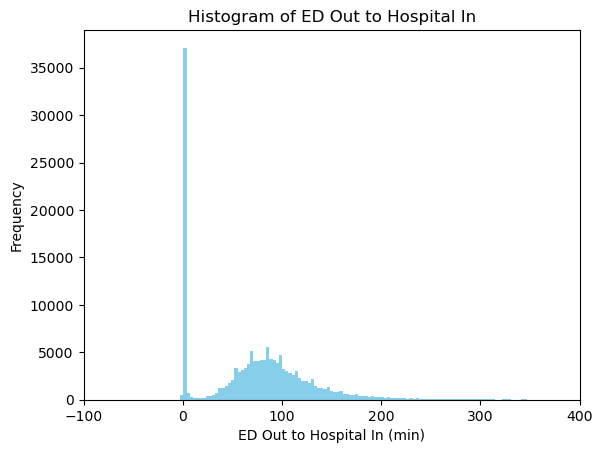

In [105]:
import matplotlib.pyplot as plt
ed_any_4['ed_out_to_hos_in_min'] = ed_any_4['ed_out_to_hos_in'].dt.total_seconds()/ 60

# 히스토그램 그리기
plt.hist(ed_any_4['ed_out_to_hos_in_min'], bins=500, color='skyblue')
plt.xlabel('ED Out to Hospital In (min)')
plt.ylabel('Frequency')
plt.title('Histogram of ED Out to Hospital In')
plt.xlim(-100, 400)

plt.show()

In [82]:
filt_data['ed_out_to_hos_in_min'].describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    157148.000000
mean         75.057405
std          66.701546
min       -2818.000000
1%            0.616667
10%           1.183333
25%           6.000000
50%          76.000000
75%         106.000000
90%         142.000000
99%         265.000000
max        1425.000000
Name: ed_out_to_hos_in_min, dtype: float64

In [34]:
hos_time=pd.to_datetime(ed_any_2['dischtime'])-pd.to_datetime(ed_any_2['admittime'])
#icu_time=pd.to_datetime(ed_any_2['icu_outtime'])-pd.to_datetime(ed_any_2['icu_intime'])

In [85]:
hos_time.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]) # 일반병동 체류시간

count                        157196
mean      5 days 05:34:01.386294816
std       6 days 18:55:06.037407184
min                 0 days 00:02:00
1%                  0 days 06:13:00
10%                 0 days 22:11:00
25%                 1 days 19:20:00
50%                 3 days 09:32:30
75%                 6 days 01:12:15
90%                10 days 20:16:00
99%      32 days 13:24:20.999999995
max               249 days 14:03:00
dtype: object

In [107]:
icu=icu[['hadm_id','intime','outtime']]
icu.rename(columns={'intime': 'icu_intime', 'outtime': 'icu_outtime'}, inplace=True)

KeyError: "['intime', 'outtime'] not in index"

In [108]:
icu=icu[icu['hadm_id'].isin(ed_any_4['hadm_id'])]
icu=icu[icu['icu_intime']<icu['icu_outtime']]

In [109]:
ed_any_5=pd.merge(ed_any_4,icu,on='hadm_id',how='left')

In [110]:
ed_any_5

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in,ed_out_to_hos_in_min,icu_intime,icu_outtime
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 01:07:00,67.000000,NaN,NaN
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00,184.000000,NaN,NaN
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00,120.000000,NaN,NaN
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00,85.000000,2180-07-23 14:00:00,2180-07-23 23:50:47
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00,84.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
157482,29048248.0,2183-12-07 13:13:00,2183-12-07 17:17:39,2183-12-07 17:16:00,2183-12-11 17:36:00,0 days 00:01:39,1.650000,2183-12-07 20:38:26,2183-12-08 21:35:50
157483,28045620.0,2127-09-21 08:42:00,2127-09-22 02:39:21,2127-09-22 02:37:00,2127-09-22 03:10:00,0 days 00:02:21,2.350000,NaN,NaN
157484,20097685.0,2202-04-02 19:43:00,2202-04-03 05:04:00,2202-04-02 22:00:00,2202-04-03 08:40:00,0 days 07:04:00,424.000000,NaN,NaN
157485,29466646.0,2172-02-18 17:05:00,2172-02-18 19:47:30,2172-02-18 19:46:00,2172-02-18 21:47:00,0 days 00:01:30,1.500000,NaN,NaN


In [91]:
ed_any_3=ed_any_3[ed_any_3['ed_out_to_hos_in']<'0 days 04:00:00']

In [106]:
hos_time=pd.to_datetime(ed_any_4['dischtime'])-pd.to_datetime(ed_any_4['admittime'])
hos_time.describe([0.01,0.1,0.25,0.5,0.75,0.961,0.99])

count                        154265
mean      5 days 05:19:52.133666094
std       6 days 18:44:35.504490784
min                 0 days 00:02:00
1%                  0 days 06:16:00
10%                 0 days 22:10:00
25%                 1 days 19:17:00
50%                 3 days 09:26:00
75%                 6 days 00:53:00
96.1%    17 days 19:42:13.439999999
99%      32 days 13:08:43.199999998
max               249 days 14:03:00
dtype: object

In [122]:
ed_any_5 = ed_any_5.drop('hos', axis=1)

In [123]:
ed_any_5

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in,ed_out_to_hos_in_min,icu_intime,icu_outtime
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 01:07:00,67.000000,NaN,NaN
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00,184.000000,NaN,NaN
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00,120.000000,NaN,NaN
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00,85.000000,2180-07-23 14:00:00,2180-07-23 23:50:47
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00,84.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
157482,29048248.0,2183-12-07 13:13:00,2183-12-07 17:17:39,2183-12-07 17:16:00,2183-12-11 17:36:00,0 days 00:01:39,1.650000,2183-12-07 20:38:26,2183-12-08 21:35:50
157483,28045620.0,2127-09-21 08:42:00,2127-09-22 02:39:21,2127-09-22 02:37:00,2127-09-22 03:10:00,0 days 00:02:21,2.350000,NaN,NaN
157484,20097685.0,2202-04-02 19:43:00,2202-04-03 05:04:00,2202-04-02 22:00:00,2202-04-03 08:40:00,0 days 07:04:00,424.000000,NaN,NaN
157485,29466646.0,2172-02-18 17:05:00,2172-02-18 19:47:30,2172-02-18 19:46:00,2172-02-18 21:47:00,0 days 00:01:30,1.500000,NaN,NaN


In [124]:
from datetime import timedelta

def hosp_condition(ed_any_5):
    #hour_after = ed_any_3['outtime'] + timedelta(hours=4)
    if ed_any_5['dischtime']-ed_any_5['admittime'] > timedelta(hours=24):
        return 1
    else:
        return 0

ed_any_5['hos']=ed_any_5.apply(hosp_condition, axis=1)

In [125]:
ed_any_5[(ed_any_5["hos"]==1)]

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in,ed_out_to_hos_in_min,icu_intime,icu_outtime,hos
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00,184.00,NaN,NaN,1
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00,120.00,NaN,NaN,1
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00,85.00,2180-07-23 14:00:00,2180-07-23 23:50:47,1
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00,84.00,NaN,NaN,1
6,27988844.0,2183-09-18 08:41:00,2183-09-18 20:20:00,2183-09-18 18:10:00,2183-09-21 16:30:00,0 days 02:10:00,130.00,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
157477,25744818.0,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,0 days 01:28:00,88.00,2149-01-08 18:12:00,2149-01-10 13:11:02,1
157478,23865745.0,2145-11-02 19:28:00,2145-11-02 22:59:00,2145-11-02 21:38:00,2145-11-11 12:57:00,0 days 01:21:00,81.00,2145-11-02 22:59:00,2145-11-04 21:29:30,1
157480,23263138.0,2145-06-04 19:14:00,2145-06-05 00:52:00,2145-06-04 23:01:00,2145-08-17 15:57:00,0 days 01:51:00,111.00,2145-07-01 11:53:58,2145-07-05 20:02:21,1
157481,23263138.0,2145-06-04 19:14:00,2145-06-05 00:52:00,2145-06-04 23:01:00,2145-08-17 15:57:00,0 days 01:51:00,111.00,2145-06-05 00:52:00,2145-06-16 00:48:01,1


In [121]:
ed_any_5[(ed_any_5["hos"]==1)]

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in,ed_out_to_hos_in_min,icu_intime,icu_outtime,hos
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00,184.00,NaN,NaN,1
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00,120.00,NaN,NaN,1
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00,85.00,2180-07-23 14:00:00,2180-07-23 23:50:47,1
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00,84.00,NaN,NaN,1
6,27988844.0,2183-09-18 08:41:00,2183-09-18 20:20:00,2183-09-18 18:10:00,2183-09-21 16:30:00,0 days 02:10:00,130.00,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
157477,25744818.0,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,0 days 01:28:00,88.00,2149-01-08 18:12:00,2149-01-10 13:11:02,1
157478,23865745.0,2145-11-02 19:28:00,2145-11-02 22:59:00,2145-11-02 21:38:00,2145-11-11 12:57:00,0 days 01:21:00,81.00,2145-11-02 22:59:00,2145-11-04 21:29:30,1
157480,23263138.0,2145-06-04 19:14:00,2145-06-05 00:52:00,2145-06-04 23:01:00,2145-08-17 15:57:00,0 days 01:51:00,111.00,2145-07-01 11:53:58,2145-07-05 20:02:21,1
157481,23263138.0,2145-06-04 19:14:00,2145-06-05 00:52:00,2145-06-04 23:01:00,2145-08-17 15:57:00,0 days 01:51:00,111.00,2145-06-05 00:52:00,2145-06-16 00:48:01,1


In [87]:
ed_any_3

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in,icu_intime,icu_outtime,hos
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 01:07:00,NaN,NaN,0
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00,NaN,NaN,0
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00,NaN,NaN,1
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00,2180-07-23 14:00:00,2180-07-23 23:50:47,1
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
160475,28045620.0,2127-09-21 08:42:00,2127-09-22 02:39:21,2127-09-22 02:37:00,2127-09-22 03:10:00,0 days 00:02:21,NaN,NaN,0
160476,20097685.0,2202-04-02 19:43:00,2202-04-03 05:04:00,2202-04-02 22:00:00,2202-04-03 08:40:00,0 days 07:04:00,NaN,NaN,0
160477,20002712.0,2207-05-08 04:29:00,2207-05-08 05:27:23,2207-05-08 05:24:00,2207-05-08 11:15:00,0 days 00:03:23,NaN,NaN,0
160478,29466646.0,2172-02-18 17:05:00,2172-02-18 19:47:30,2172-02-18 19:46:00,2172-02-18 21:47:00,0 days 00:01:30,NaN,NaN,0


In [127]:
ed_any_5['icu_outtime']=pd.to_datetime(ed_any_5['icu_outtime'])
ed_any_5['icu_intime']=pd.to_datetime(ed_any_5['icu_intime'])

In [200]:
ed_any_5 = ed_any_5.drop('icu', axis=1)

In [201]:
def icu_condition(ed_any_5):
    #one_hour_after = ed_any_5['outtime'] + timedelta(hours=1)
    if ed_any_5['icu_intime'] < ed_any_5['outtime'] + timedelta(hours=4) :
        return 1
    else:
        return 0
ed_any_5['icu']=ed_any_5.apply(icu_condition, axis=1)

In [202]:
ed_any_5

,hadm_id,intime,outtime,admittime,dischtime,ed_out_to_hos_in,ed_out_to_hos_in_min,icu_intime,icu_outtime,hos,icu
0,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 01:07:00,67.000000,NaT,NaT,0,0
1,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,0 days 03:04:00,184.000000,NaT,NaT,1,0
2,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,0 days 02:00:00,120.000000,NaT,NaT,1,0
3,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,0 days 01:25:00,85.000000,2180-07-23 14:00:00,2180-07-23 23:50:47,1,1
4,23052089.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,0 days 01:24:00,84.000000,NaT,NaT,1,0
...,...,...,...,...,...,...,...,...,...,...,...
157482,29048248.0,2183-12-07 13:13:00,2183-12-07 17:17:39,2183-12-07 17:16:00,2183-12-11 17:36:00,0 days 00:01:39,1.650000,2183-12-07 20:38:26,2183-12-08 21:35:50,1,1
157483,28045620.0,2127-09-21 08:42:00,2127-09-22 02:39:21,2127-09-22 02:37:00,2127-09-22 03:10:00,0 days 00:02:21,2.350000,NaT,NaT,0,0
157484,20097685.0,2202-04-02 19:43:00,2202-04-03 05:04:00,2202-04-02 22:00:00,2202-04-03 08:40:00,0 days 07:04:00,424.000000,NaT,NaT,0,0
157485,29466646.0,2172-02-18 17:05:00,2172-02-18 19:47:30,2172-02-18 19:46:00,2172-02-18 21:47:00,0 days 00:01:30,1.500000,NaT,NaT,0,0


In [203]:
len(set(ed_any_5[(ed_any_5["hos"]==1)&(ed_any_5["icu"]==0)]['hadm_id'].unique()))

115160

In [204]:
icu_hadm=set(ed_any_5[(ed_any_5["hos"]==1)&(ed_any_5["icu"]==1)]['hadm_id'].unique())
len(icu_hadm)

22797

In [205]:
hos_hadm=set(ed_any_5[(ed_any_5["hos"]==1)&(ed_any_5["icu"]==0)]['hadm_id'].unique())-icu_hadm
len(hos_hadm)

113218

In [206]:
hos_hadm&icu_hadm

set()

In [207]:
hos_id=set(noted[noted['hadm_id'].isin(hos_hadm)]['stay_id'])

In [208]:
#icu_id=set(noted[noted['hadm_id'].isin(icu_hadm)]['stay_id'])

In [227]:
icu_id=set(noted[noted['hadm_id'].isin(icu_hadm)]['stay_id'])

In [228]:
len(icu_id)

22797

In [210]:
icu_id

{31588363,
 31719442,
 33816602,
 36831261,
 33161255,
 37093419,
 31981622,
 30933059,
 30277701,
 37224518,
 36962384,
 33554513,
 38928479,
 30933089,
 39583844,
 39321707,
 37093484,
 39452789,
 37748863,
 36962438,
 35782792,
 31981707,
 38011024,
 35782806,
 34472088,
 31064219,
 39583906,
 31064231,
 34078888,
 32637100,
 37486766,
 36438203,
 34996412,
 30015681,
 38928577,
 33292483,
 32112842,
 33030349,
 39059678,
 37224670,
 30933230,
 38273263,
 30802158,
 30802167,
 30408957,
 38928638,
 32506110,
 30802174,
 32637218,
 36569379,
 30146857,
 32768298,
 35651898,
 36700475,
 31588676,
 38273354,
 32899404,
 31326541,
 39453015,
 37486937,
 31588710,
 30015848,
 34079080,
 32768366,
 36962681,
 37486974,
 34472326,
 32768393,
 30540175,
 37093776,
 38273425,
 30146965,
 33948058,
 31064499,
 37749191,
 37093834,
 30409175,
 30278104,
 33554911,
 34603505,
 31982088,
 34210316,
 38535700,
 34472471,
 31326748,
 30540318,
 37618211,
 31588910,
 34603567,
 36831791,
 33423919,

In [211]:
len(hos_id)

113218

In [212]:
hos_id

{39583744,
 37748740,
 37224452,
 37224455,
 35651591,
 31719437,
 38535184,
 35389460,
 39321623,
 39321624,
 30146587,
 36700188,
 38273061,
 31195174,
 31719461,
 30408747,
 37224496,
 38010930,
 33816627,
 35913782,
 30408758,
 39583801,
 39321657,
 31981629,
 32243778,
 31719494,
 32505930,
 38010958,
 35651665,
 37224532,
 34078804,
 32505943,
 39845991,
 33816687,
 30146672,
 36700281,
 30670970,
 33030266,
 38011005,
 39583873,
 32243842,
 32505990,
 30933129,
 39059594,
 36962448,
 31457425,
 32506003,
 37224596,
 36700308,
 31981718,
 36176026,
 37486750,
 31981727,
 37748897,
 34603170,
 35127458,
 39583910,
 38535335,
 35913896,
 32243882,
 31981738,
 30146736,
 36962486,
 30146744,
 33292473,
 34865355,
 30146764,
 34078925,
 35389651,
 39583957,
 30933206,
 37224667,
 36700380,
 38011100,
 34078945,
 33816803,
 36176101,
 36176106,
 39059697,
 31981811,
 38535412,
 33030389,
 36438259,
 39583989,
 38797560,
 35913977,
 38011130,
 38797561,
 35389693,
 39321854,
 30933249,

In [232]:
import pickle

with open('new_ed_stay_id.pkl', 'wb') as f:
    pickle.dump(ed_id, f)
with open('new_hos_stay_id.pkl', 'wb') as f:
    pickle.dump(hos_id, f)
with open('new_icu_stay_id.pkl', 'wb') as f:
    pickle.dump(icu_id, f)
with open('new_died_stay_id.pkl', 'wb') as f:
    pickle.dump(list(ed[ed['disposition']=='EXPIRED']['stay_id']), f)

In [214]:
#with open('ed_stay_id.pkl', 'rb') as f:
#    ed_id = pickle.load(f)
#with open('hos_stay_id.pkl', 'rb') as f:
#    hos_id = pickle.load(f)
#with open('icu_stay_id.pkl', 'rb') as f:
#    icu_id = pickle.load(f)
#with open('stay_id_map.pkl', 'rb') as f:
#    stay_id_map = pickle.load(f)

In [231]:
list(ed[ed['disposition']=='EXPIRED']['stay_id'])

[30308539,
 34547687,
 39740841,
 33768159,
 35630864,
 39588306,
 37194940,
 34320022,
 32948464,
 31891278,
 39753604,
 38439085,
 39163943,
 31065463,
 37415705,
 34131392,
 38678036,
 37075657,
 38066888,
 34689703,
 38467903,
 39136238,
 38523350,
 32157813,
 33984982,
 38317034,
 35315786,
 34810347,
 33944406,
 33869599,
 33679922,
 30756716,
 39524946,
 31388042,
 31516860,
 31367673,
 39524184,
 35712182,
 32472116,
 33682808,
 30903255,
 37430690,
 36147506,
 38394113,
 39140056,
 31797843,
 31120698,
 33717643,
 37410829,
 30337688,
 31147119,
 36824807,
 36492643,
 35033884,
 30115596,
 30831433,
 37667078,
 38459529,
 34485356,
 32878474,
 31434257,
 30909991,
 31086705,
 30548179,
 31133956,
 30109821,
 39885847,
 35546212,
 31053770,
 35962659,
 33481652,
 36792684,
 30362356,
 39770715,
 30925907,
 36330181,
 39746899,
 32718428,
 33535449,
 38278637,
 30270090,
 38319687,
 31156114,
 38603323,
 38109028,
 37835506,
 39053724,
 32842011,
 38153775,
 35860332,
 32561058,

In [233]:
ed.loc[ed['stay_id'].isin(ed_id), 'result'] = 'ed'
ed.loc[ed['stay_id'].isin(hos_id), 'result'] = 'hos'
ed.loc[ed['stay_id'].isin(icu_id), 'result'] = 'icu'
ed.loc[ed['stay_id'].isin(ed[ed['disposition']=='EXPIRED']['stay_id']), 'result'] = 'ed_dead'

In [234]:
ed[ed['result'].isin()]

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,result
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,White,AMBULANCE,ADMITTED,NaN
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,White,AMBULANCE,ADMITTED,hos
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,White,AMBULANCE,ADMITTED,hos
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,White,AMBULANCE,HOME,NaN
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,White,AMBULANCE,ADMITTED,icu
...,...,...,...,...,...,...,...,...,...,...
425082,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,Black,WALK IN,ADMITTED,hos
425083,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,White,AMBULANCE,ADMITTED,icu
425084,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,White,WALK IN,ADMITTED,NaN
425085,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,Other,OTHER,ELOPED,NaN


In [217]:
ed['result'].value_counts().index

Index(['ed', 'hos', 'icu', 'ed_dead'], dtype='object')

In [218]:
ed[ed['disposition']=='EXPIRED']['stay_id']

1450      30308539
1680      34547687
1692      39740841
2550      33768159
3243      35630864
            ...   
421422    30970126
421989    37942091
422256    39780645
424849    37776073
425040    32846388
Name: stay_id, Length: 377, dtype: int64

In [219]:
ed

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,result
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,White,AMBULANCE,ADMITTED,NaN
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,White,AMBULANCE,ADMITTED,hos
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,White,AMBULANCE,ADMITTED,hos
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,White,AMBULANCE,HOME,NaN
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,White,AMBULANCE,ADMITTED,icu
...,...,...,...,...,...,...,...,...,...,...
425082,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,Black,WALK IN,ADMITTED,hos
425083,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,White,AMBULANCE,ADMITTED,icu
425084,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,White,WALK IN,ADMITTED,NaN
425085,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,Other,OTHER,ELOPED,NaN


In [220]:
new_ed=ed[ed['result'].isin(ed['result'].value_counts().index)]

In [180]:
#new_ed=ed[ed['result'] != 'NaN']

In [221]:
new_ed.reset_index(drop=True,inplace=True)

In [222]:
#new_ed.to_csv('new_edstays.csv', index=False)

In [223]:
new_ed

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,result
0,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,White,AMBULANCE,ADMITTED,hos
1,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,White,AMBULANCE,ADMITTED,hos
2,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,White,AMBULANCE,ADMITTED,icu
3,10000084,23052089.0,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,White,WALK IN,ADMITTED,hos
4,10000108,NaN,32522732,2163-09-16 16:34:00,2163-09-16 18:13:00,M,White,WALK IN,HOME,ed
...,...,...,...,...,...,...,...,...,...,...
341520,19999784,24935234.0,37972930,2119-07-09 17:38:00,2119-07-10 00:04:00,M,Black,WALK IN,ADMITTED,hos
341521,19999784,25715748.0,34149746,2119-08-11 09:15:00,2119-08-11 13:40:00,M,Black,WALK IN,ADMITTED,hos
341522,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,Black,WALK IN,ADMITTED,hos
341523,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,White,AMBULANCE,ADMITTED,icu


In [251]:
new_ed['result'].value_counts()

ed         205135
hos        113218
icu         22795
ed_dead       377
Name: result, dtype: int64

In [244]:
#new_ed.to_csv('new_edstays_240306.csv', index=False)

In [250]:
hos[hos['hadm_id'].isin(hos_hadm)]['hospital_expire_flag']

0    111758
1      1460
Name: hospital_expire_flag, dtype: int64

In [254]:
set(new_ed[new_ed['result']=='ed']['stay_id'])&set(new_ed[new_ed['result']=='hos']['stay_id'])&set(new_ed[new_ed['result']=='icu']['stay_id'])&set(new_ed[new_ed['result']=='ed_dead']['stay_id'])

set()